In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

In [2]:
df = pd.read_csv("tomofun_train.csv")
print(df.head())

             fname    label
0  train_00001.wav  Barking
1  train_00002.wav  Barking
2  train_00003.wav  Barking
3  train_00004.wav  Barking
4  train_00005.wav  Barking


In [3]:
wav_data = []
wav_label = []

now_path = os.getcwd()

idx = [0, 200, 392, 600]

for i in idx:
    wav_label.append(df["label"][i])
    wav_path = os.path.join(now_path, "Tomofun-AI--master/train/train", df["fname"][i])
    y, sr = librosa.load(wav_path, sr=None)
    wav_data.append(y)

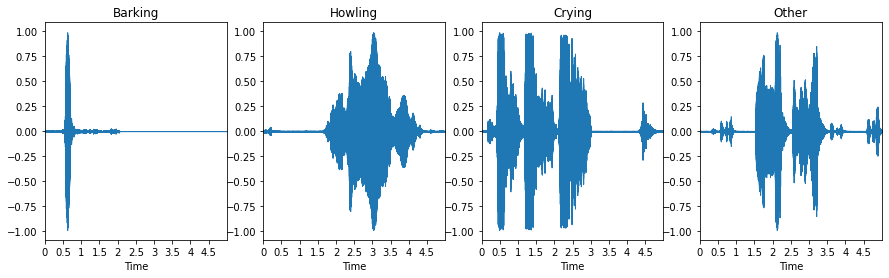

In [4]:
# wav plot
fig, axes = plt.subplots(figsize=(15, 4), nrows=1, ncols=4)

for i in range(len(wav_data)):
    librosa.display.waveplot(y=wav_data[i], sr=sr, ax=axes[i]);
    axes[i].set(title=wav_label[i])

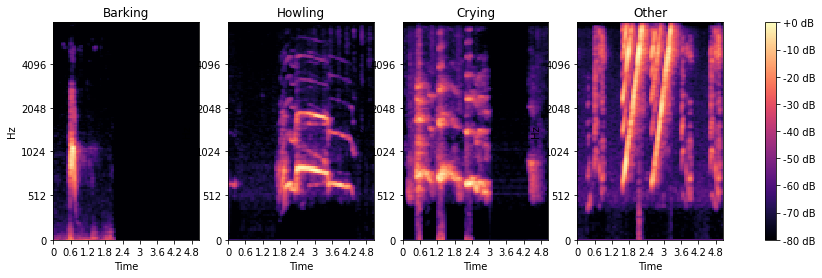

In [5]:
# Mel-frequency spectrogram

fig, axes = plt.subplots(figsize=(15, 4), nrows=1, ncols=4)

for i in range(len(wav_data)):
    mel_data = librosa.feature.melspectrogram(y=wav_data[i], sr=sr)
    mel_data_db = librosa.power_to_db(mel_data, ref=np.max)

    img = librosa.display.specshow(mel_data_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=axes[i])
    axes[i].set(title=wav_label[i])
    
fig.colorbar(img, ax=axes, format='%+2.0f dB')